# Midterm Exam

Please read each question carefully and write your code.<br>
Feel free to use one or more cells to solve each question.

When submitting, rename the file to midterm_[student_id].ipynb (ex.midterm_20211234.ipynb) and submit it to PLMS.

In [2]:
# DO NOT import any external libraries other than these.
# There will be a penalty for importing external libraries for any reason.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sklearn.manifold import TSNE
%matplotlib inline

We will use the following datasets in `data` folder.
- `disney_movies_total_gross.csv`
- `disney-characters.csv`

Read the csv files and load them into dataframes named `gross_df` and `chracter_df` respectively.

In [3]:
gross_df=pd.read_csv('disney_movies_total_gross.csv')
chracter_df=pd.read_csv('disney-characters.csv')

In [4]:
gross_df.head()

,index,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,0,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,"$184,925,485","$5,228,953,251"
1,1,Pinocchio,"Feb 9, 1940",Adventure,G,"$84,300,000","$2,188,229,052"
2,2,Fantasia,"Nov 13, 1940",Musical,G,"$83,320,000","$2,187,090,808"
3,3,Song of the South,"Nov 12, 1946",Adventure,G,"$65,000,000","$1,078,510,579"
4,4,Cinderella,"Feb 15, 1950",Drama,G,"$85,000,000","$920,608,730"


In [5]:
chracter_df.head()

,index,movie_title,release_date,hero,villian,song
0,0,\nSnow White and the Seven Dwarfs,"December 21, 1937",Snow White,Evil Queen,Some Day My Prince Will Come
1,1,\nPinocchio,"February 7, 1940",Pinocchio,Stromboli,When You Wish upon a Star
2,2,\nFantasia,"November 13, 1940",NaN,Chernabog,NaN
3,3,Dumbo,"October 23, 1941",Dumbo,Ringmaster,Baby Mine
4,4,\nBambi,"August 13, 1942",Bambi,Hunter,Love Is a Song


## Q1
For both dataframes, print the number of nan values in each column and delete the rows with one or more nan values.

In [21]:
gross_df.isna().sum()



index                        0
movie_title                  0
release_date                 0
genre                       17
MPAA_rating                 56
total_gross                  0
inflation_adjusted_gross     0
dtype: int64

In [22]:
chracter_df.isna().sum()


index            0
movie_title      0
release_date     0
hero             4
villian         10
song             9
dtype: int64

In [15]:
gross_df.dropna()
chracter_df.dropna()

,index,movie_title,release_date,hero,villian,song
0,0,\nSnow White and the Seven Dwarfs,"December 21, 1937",Snow White,Evil Queen,Some Day My Prince Will Come
1,1,\nPinocchio,"February 7, 1940",Pinocchio,Stromboli,When You Wish upon a Star
3,3,Dumbo,"October 23, 1941",Dumbo,Ringmaster,Baby Mine
4,4,\nBambi,"August 13, 1942",Bambi,Hunter,Love Is a Song
10,10,\nThe Adventures of Ichabod and Mr. Toad,"October 5, 1949",Mr. Toad and Ichabod Crane,Mr. Winkie and The Headless Horseman,The Merrily Song
11,11,Cinderella,"February 15, 1950",Cinderella,Lady Tremaine,Bibbidi-Bobbidi-Boo
12,12,\nAlice in Wonderland,"July 28, 1951",Alice,Queen of Hearts,The Unbirthday Song
13,13,\nPeter Pan,"February 5, 1953",Peter Pan,Captain Hook,You Can Fly!
14,14,\nLady and the Tramp,"June 22, 1955",Lady and Tramp,Si and Am,Bella Notte
15,15,Sleeping Beauty,"January 29, 1959",Aurora,Maleficent,Once Upon a Dream


## Q2
For `gross_df`, remove `$`, `,` in `total_gross` column and change to integer.

In [26]:
for i in gross_df['total_gross']:
    i.translate({})
    i.replace(',','')
    i=int(i)

print(gross_df)



ValueError: invalid literal for int() with base 10: '184,925,485'

For `gross_df`, create a new column called `title_length` with the value 'long' if the movie title has more than 6 words, otherwise 'short'.

TypeError: 'builtin_function_or_method' object is not subscriptable

For `character_df`, remove `/n` in `movie_title`.

For both dataframe, create a new column called `year` where the value is an interger that represents the year the movie was released.

NameError: name 'df' is not defined

## Q3
Generate a new dataframe called `data` with movie title, year, genre, hero, and total_gross and as columns. <br>
When generating a dataframe, use method that **does not produce nan values**. <br>
Note that the pair of `movie_title` and `year` is unique for each movie. <br>

KeyError: 'Year'

In `data` dataframe, print which genre has the highest average total gross. <br>
Note that the output must be a string.

KeyError: 'genre'

Use seaborn to draw a barplot that shows total_gross of each genre in `gross_df`.

NameError: name 'data' is not defined

## Q4
For question 4, We will use the following dataset in `data` folder.
- `disney_revenue_1991-2016.csv`

Read the csv file and load it into a dataframe named `revenue_df`.

,Year,Studio Entertainment[NI 1],Disney Consumer Products[NI 2],Disney Interactive[NI 3][Rev 1],Walt Disney Parks and Resorts,Total
0,1991,2593.0,724.0,NaN,2794.0,6111
1,1992,3115.0,1081.0,NaN,3306.0,7502
2,1993,3673.4,1415.1,NaN,3440.7,8529
3,1994,4793.0,1798.2,NaN,3463.6,10414
4,1995,6001.5,2150.0,NaN,3959.8,12525


Use matplotlib to draw a line graph that shows total revenue for each year from `revenue_df`. <br>
Set x-axis to 'Year' and y-axis to 'Total_Revenue'. <br>
Note that the `Total` in revenue_df represents the total revenue for each year.

<function matplotlib.pyplot.show(close=None, block=None)>

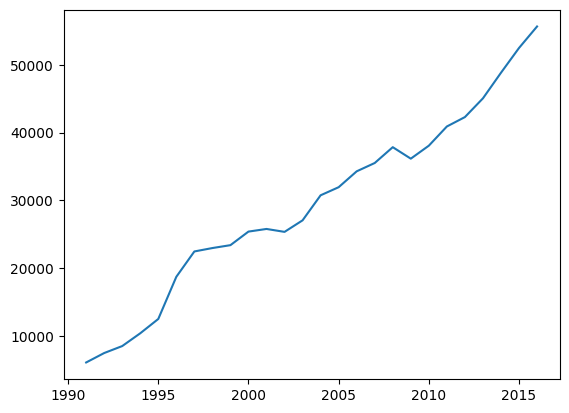

Drop the column named `Total` in `revenue_df` and fill all nan values with zeros.<br>

,Year,Studio Entertainment[NI 1],Disney Consumer Products[NI 2],Disney Interactive[NI 3][Rev 1],Walt Disney Parks and Resorts,Total
0,1991,2593.0,724.0,0.0,2794.0,6111
1,1992,3115.0,1081.0,0.0,3306.0,7502
2,1993,3673.4,1415.1,0.0,3440.7,8529
3,1994,4793.0,1798.2,0.0,3463.6,10414
4,1995,6001.5,2150.0,0.0,3959.8,12525


Perform dimensionality reduction using t-SNE. The size of the reduced dimension is 2.<br>
Print a dataframe with column names 'component_0' and 'component_1', with each row representing the output of tsne.

ValueError: perplexity must be less than n_samples

## Q5
1. Create and connect a database named `temp.db`.<br>
2. Create a table named `Wine` and insert following data and save the changes. <br>

    | City      | Price | Type | Rating |
    | :- | :- | :- | :- |
    | Seattle  | 10   | 1  | 4.75   | 
    | Boston  | 17   | 2  | 4.02   | 
    | Pittsburgh  | 20   | 1  | 3.33   | 
    | San Diego | 9    | 1  | 3.87   | 

Print the names of cities with Type 1 wines rated higher than 4.0.<br>
You may print the result in the form of a list of tuples.

[('Seattle',)]


Print the average price and rating by Type.

[(1, 13.0, 3.983333333333333), (2, 17.0, 4.02)]
